<a href="https://colab.research.google.com/github/skywalker0803r/deep-learning-ian-goodfellow/blob/master/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

data = datasets.load_boston()
x = pd.DataFrame(data.data,columns=data.feature_names)[['INDUS','LSTAT']]

# 準備資料

In [0]:
# scaler
ss = StandardScaler()
x[:] = ss.fit_transform(x)

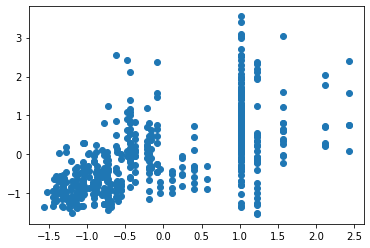

,INDUS,LSTAT
INDUS,1.0000,0.6038
LSTAT,0.6038,1.0000


In [3]:
# look
plt.scatter(x['INDUS'],x['LSTAT'])
plt.show()
x.corr()

# sklearn算

In [4]:
# sklearn pca
z = {}
pca = PCA(n_components=1)
z['sklearn'] = pca.fit_transform(x)
print(pca.components_)

[[0.70710678 0.70710678]]


# 手算

In [5]:
# scratch
w,v = np.linalg.eig(x.corr())
w = w[1]
v = v[1]
print(v)
z['scratch'] = v@x.values.T

[0.70710678 0.70710678]


# 比較

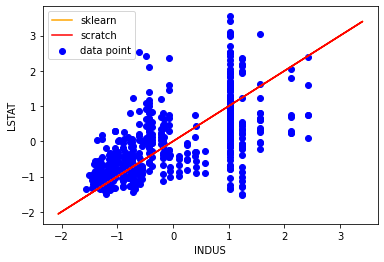

In [6]:
plt.scatter(x['INDUS'],x['LSTAT'],label='data point',color='b')
plt.plot(z['sklearn'],z['sklearn'],label='sklearn',color='orange')
plt.plot(z['scratch'],z['scratch'],label='scratch',color='red')
plt.xlabel('INDUS')
plt.ylabel('LSTAT')
plt.legend()
plt.show()